In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

data_dir = Path("practical-statistics-for-data-scientists/data")

# Random Sampling


- **Sample**<br>
  A subset from a larger data set.<br>

- **Population**<br>
  The larger data set or idea of a data set.<br>
- **N (n)**<br>
  The size of the population (sample).<br>
- **Random sampling**<br>
  Drawing elements into a sample at random.<br>
- **Stratified sampling**<br>
  Dividing the population into strata and randomly sampling from each strata.
- **Stratum (pl., strata)**<br>
  A homogeneous subgroup of a population with common characteristics.<br>
- **Simple random sample**<br>
  The sample that results from random sampling without stratifying the
  population.<br>
- **Bias**<br>
  Systematic error.<br>
  An important distinction should be made between errors due to random chance and errors due to bias. Consider the physical process of a gun shooting at a target. It will not hit the absolute center of the target every time, or even much at all. An unbiased process will produce error, but it is random and does not tend strongly in any direction. The results shown in Figure 2-3 show a biased process—there is still random error in both the x and y direction, but there is also a bias. Shots tend to fall in the upper-right quadrant.

- **Sample bias**<br>
  A sample that misrepresents the population<br>


# Sampling Distribution


- **Sample statistic**<br>
  A metric calculated for a sample of data drawn from a larger population.<br>

- **Data distribution**<br>
  The frequency distribution of individual values in a data set.<br>
- **Sampling distribution**<br>
  The frequency distribution of a sample statistic over many samples or resamples.<br>
- **Central limit theorem**<br>
  The tendency of the sampling distribution to take on a normal shape as sample
  size rises.<br>
- **Standard error**<br>
  The variability (standard deviation) of a sample statistic over many samples (not
  to be confused with standard deviation, which by itself, refers to variability of
  individual data values).


# CLT

The means drawn from multiple samples will resemble the familiar bell-shaped normal curve even if the source population is not normally distributed, provided that

1. the sample size is large enough
2. the
   departure of the data from normality is not too great.


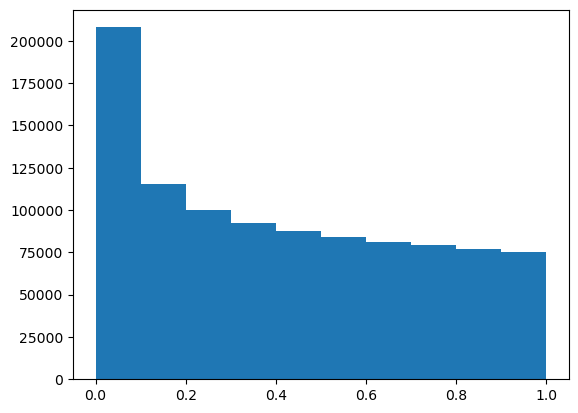

In [2]:
pop = np.random.random(size=(1_000_000,))
pop[:500_000] = pop[:500_000] ** 2
plt.hist(x=pop, bins=10)
plt.show()

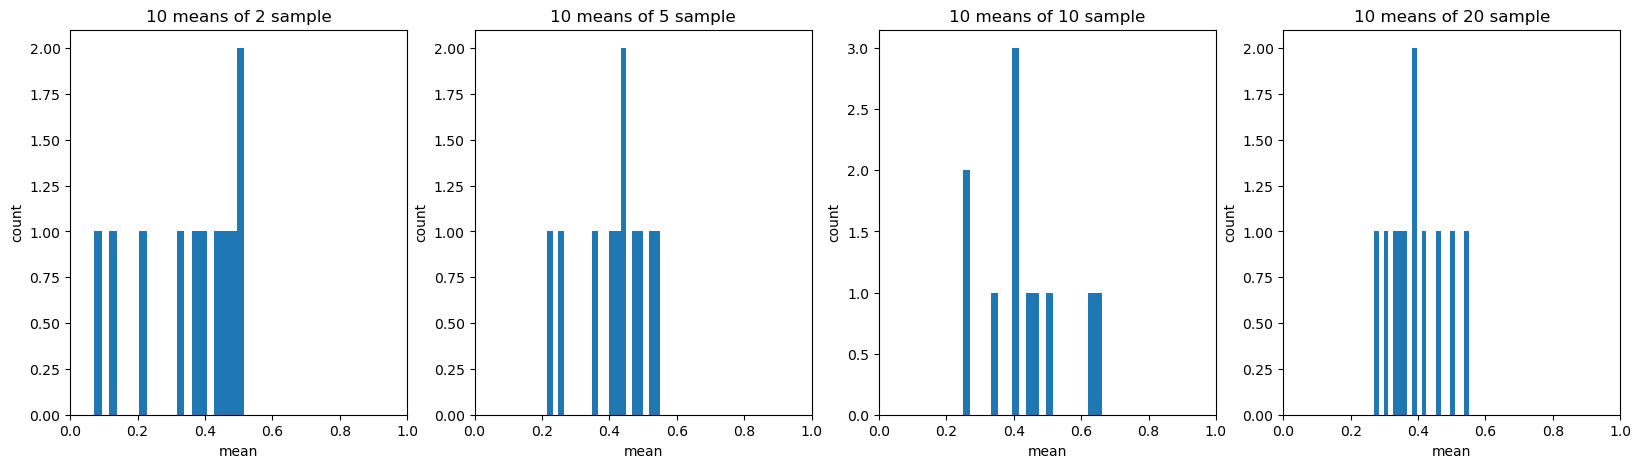

In [3]:
n_sample = [2, 5, 10, 20]  # number of sample
n_bootstrap = range(11)  # number we do sampling
k = 1

plt.figure(figsize=(20, 5))

for i in n_sample:
    means = [(np.random.choice(pop, size=i).mean()) for j in n_bootstrap]
    plt.subplot(1, 4, k)
    plt.hist(x=means, bins=20)
    plt.xlim(0, 1)
    plt.title(f"{n_bootstrap[-1]} means of {i} sample")
    plt.xlabel("mean")
    plt.ylabel("count")
    k = k + 1

plt.show()

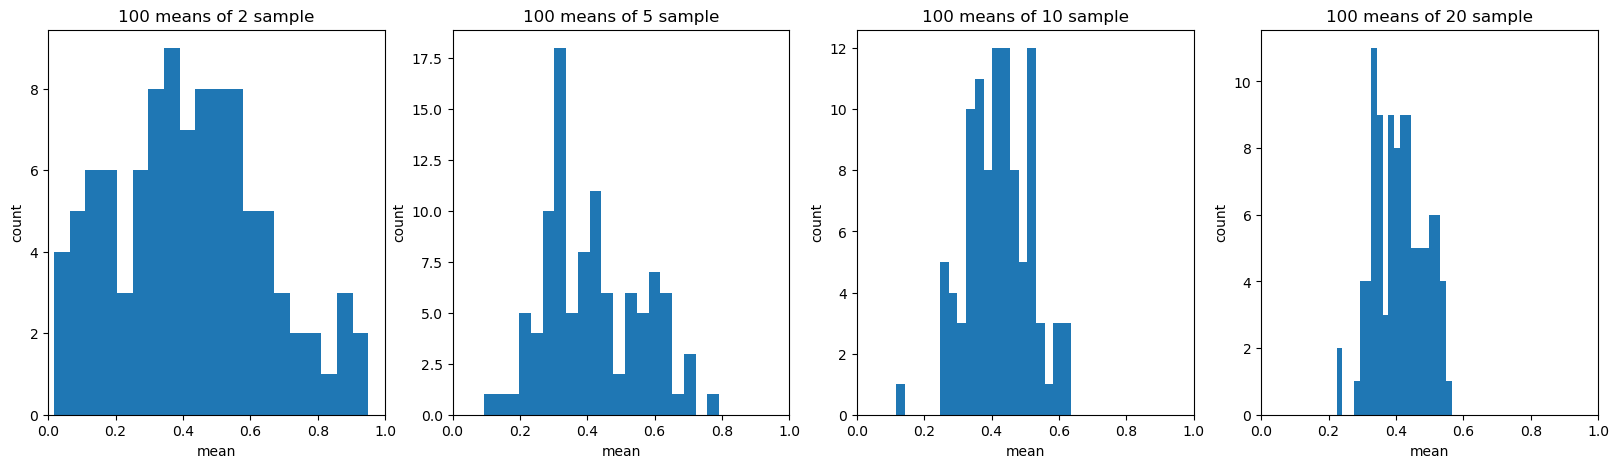

In [4]:
n_sample = [2, 5, 10, 20]  # number of sample
n_bootstrap = range(101)  # number we do sampling
k = 1

plt.figure(figsize=(20, 5))

for i in n_sample:
    means = [(np.random.choice(pop, size=i).mean()) for j in n_bootstrap]
    plt.subplot(1, 4, k)
    plt.hist(x=means, bins=20)
    plt.xlim(0, 1)
    plt.title(f"{n_bootstrap[-1]} means of {i} sample")
    plt.xlabel("mean")
    plt.ylabel("count")
    k = k + 1

plt.show()

# Bootstrap


Sampling with replacement from an observed data set.

- **Bootstrap sample**<br>
  A sample taken with replacement from an observed data set.<br>

- **Resampling**<br>
  The process of taking repeated samples from observed data; includes both boot‐
  strap and permutation (shuffling) procedures.


Conceptually, you can imagine the bootstrap as _replicating the original sample thousands or millions of times so that you have a hypothetical population that embodies all the knowledge from your original sample (it’s just larger)_. You can then draw samples from this hypothetical population for the purpose of estimating a sampling distribution.

The algorithm for a bootstrap resampling of the mean, for a sample of size n, is as follows:<br>

1. Draw a sample value, record it, and then replace it.<br>
2. Repeat n times.<br>
3. Record the mean of the n resampled values.<br>
4. Repeat steps 1–3 R times.<br>
5. Use the R results to:<br> 1. Calculate their standard deviation (this estimates sample mean standard
   error).<br> 2. Produce a histogram or boxplot.<br> 3. Find a confidence interval.<br>


In [5]:
loans_income = pd.read_csv(data_dir / "loans_income.csv")
print(len(loans_income))
print(np.median(loans_income.x))
loans_income.head()

50000
62000.0


,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [6]:
loans_income_arr = loans_income["x"].values

In [7]:
results = []
for nrepeat in range(1_000):
    sample_idx = np.random.randint(0, loans_income_arr.shape[0], size=loans_income_arr.shape[0])
    sample = loans_income_arr[sample_idx]
    results.append(np.median(sample))
results = pd.Series(results)

In [8]:
print("Bootstrap Statistics:")
print(f"original: {loans_income.median().values}")
print(f"bootstrap: {results.mean()}")
print(f"bias: {results.mean() - loans_income.median().values}")
print(f"std. error: {results.std()}")

Bootstrap Statistics:
original: [62000.]
bootstrap: 61919.7855
bias: [-80.2145]
std. error: 233.08049952539582


We can warp `resample` in a function to reuse it.

In [9]:
def resample(x):
    sample_idx = np.random.randint(0, x.shape[0], size=x.shape[0])
    sample = x[sample_idx]
    return sample

# Confidence Interval


- **Confidence level**<br>
  The percentage of confidence intervals, constructed in the same way from the
  same population, that are expected to contain the statistic of interest.<br>

- **Interval endpoints**<br>
  The top and bottom of the confidence interval.


> One way to think of a 90% confidence interval is as follows:
> it is the interval that encloses the central 90% of the bootstrap sampling distribution
> of a sample statistic


Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:<br>

1. Draw a random sample of size n with replacement from the data (a resample).<br>
2. Record the statistic of interest for the resample.<br>
3. Repeat steps 1–2 many (R) times.<br>
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from
   either end of the distribution.<br>
5. The trim points are the endpoints of an x% bootstrap confidence interval<br>


pop mean: 68760.51844
num of pop: 50000


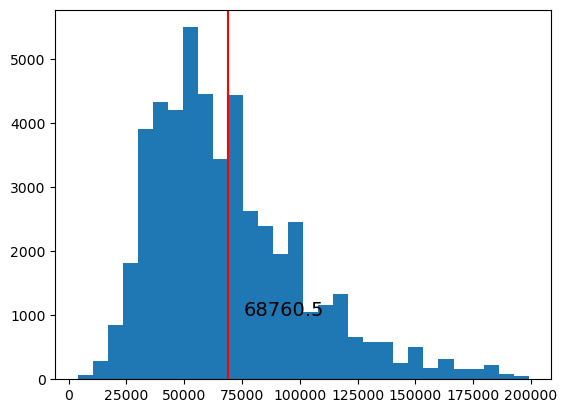

In [10]:
print(f"pop mean: {loans_income.x.mean()}")
print(f"num of pop: {len(loans_income)}")

plt.hist(loans_income["x"], bins=30)
plt.axvline(x=loans_income.x.mean(), color="red")
plt.text(
    x=loans_income.x.mean() * 1.1,
    y=1000,
    s=round(loans_income.x.mean(), 1),
    fontsize=14,
)
plt.show()

num of sample: 100
num of bootstrapping: 1000


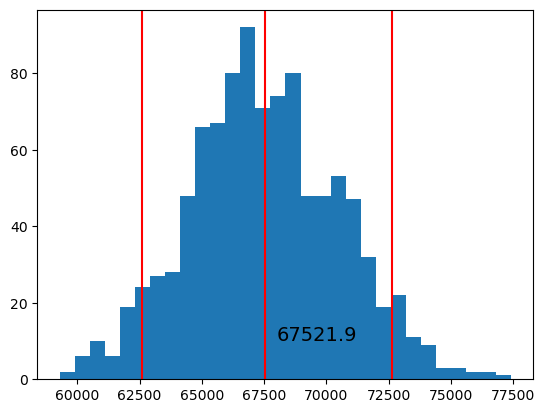

In [11]:
# take original sample from population
loans_income_sample = np.random.choice(loans_income["x"], size=100, replace=True)


# then we do bootstrapping
n_bootstrap = 1_000  # number of bootstrapping
bootstrap_means = []

for i in range(n_bootstrap):
    bootstrap_mean = resample(loans_income_sample).mean()
    bootstrap_means.append(bootstrap_mean)

print(f"num of sample: {len(loans_income_sample)}")
print(f"num of bootstrapping: {len(bootstrap_means)}")

plt.hist(x=bootstrap_means, bins=30)


def Average(lst):
    return sum(lst) / len(lst)


plt.axvline(x=Average(bootstrap_means), color="red")

a, b = np.quantile(bootstrap_means, q=[0.05, 0.95])
plt.axvline(x=a, color="red")
plt.axvline(x=b, color="red")

plt.text(
    x=Average(bootstrap_means) + 500,
    y=10,
    s=round(Average(bootstrap_means), 1),
    fontsize=14,
)
plt.show()

In [12]:
a, b = np.quantile(bootstrap_means, q=[0.05, 0.95])
print("95% confidence interval", a, b)

95% confidence interval 62600.285500000005 72648.73700000001


Let's try using z-score method to make sure that the above CI is correct.

In [35]:
population_mean = loans_income["x"].mean()
sample_mean = loans_income_sample.mean()
sample_std = np.std(loans_income_sample)
sample_size = loans_income_sample.shape[0]

# calculate SE
se = sample_std / np.sqrt(sample_size)
# determine critical value
# for 96% CI, the critical value is z = 1.96
# CI = x +- z*SE
z = 1.96
lower, upper = sample_mean - (se * z), sample_mean + (se * z)

print("95% confidence interval with bootstrapping", a, b)
print("95% confidence interval with z-score method", lower, upper)

95% confidence interval with bootstrapping 62600.285500000005 72648.73700000001
95% confidence interval with z-score method 61669.838309319224 73239.96169068076


# Normal Distribution


- **Error**<br>
  The difference between a data point and a predicted or average value.<br>

- **Standardize**<br>
  Subtract the mean and divide by the standard deviation.<br>
- **z-score**<br>
  The result of standardizing an individual data point.<br>
- **Standard normal**<br>
  A normal distribution with mean = 0 and standard deviation = 1.<br>
- **QQ-Plot**<br>
  A plot to visualize how close a sample distribution is to a specified distribution,
  e.g., the normal distribution<br>

> Converting data to z-scores (i.e., standardizing or normalizing the
> data) does not make the data normally distributed. It just puts the
> data on the same scale as the standard normal distribution, often
> for comparison purposes.

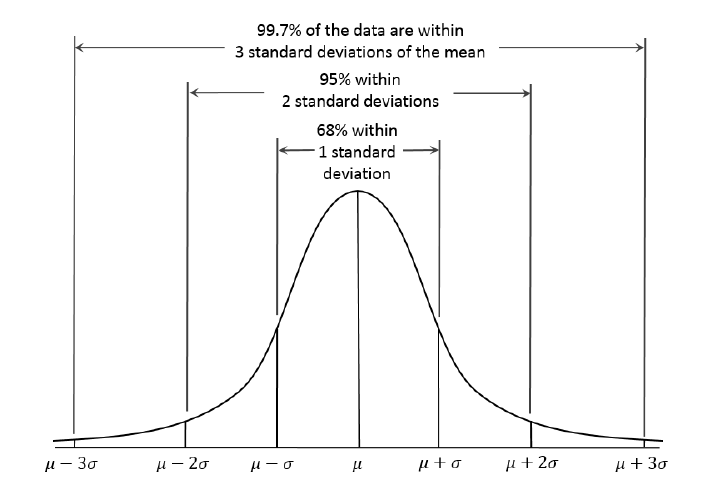


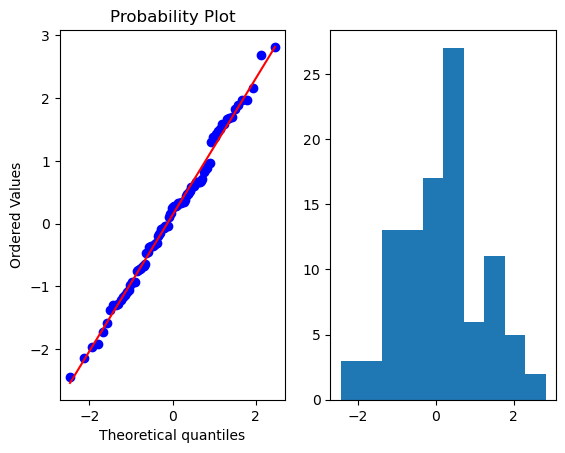

In [13]:
# qqplot

from scipy import stats

norm_sample = stats.norm.rvs(size=100)

ax = plt.subplot(1, 2, 1)
stats.probplot(norm_sample, plot=ax)

ax2 = plt.subplot(1, 2, 2)
ax2 = plt.hist(norm_sample)

plt.show()

# Long-Tailed Distribution


- **Tail**<br>
  The long narrow portion of a frequency distribution, where relatively extreme
  values occur at low frequency.<br>

- **Skew**<br>
  Where one tail of a distribution is longer than the other.


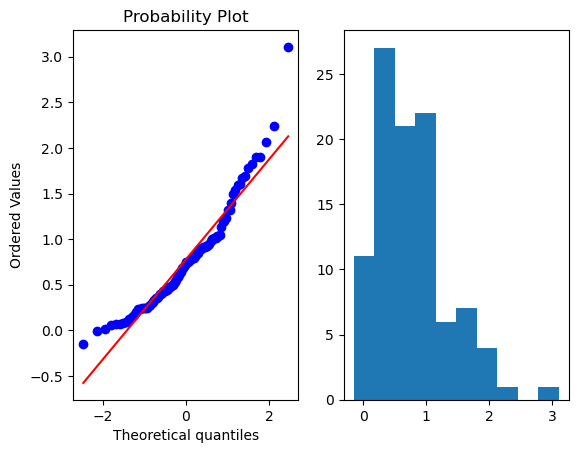

In [14]:
# qqplot

from scipy import stats

skewed_sample = stats.skewnorm.rvs(size=100, a=10)

ax = plt.subplot(1, 2, 1)
stats.probplot(skewed_sample, plot=ax)

ax2 = plt.subplot(1, 2, 2)
ax2 = plt.hist(skewed_sample)

plt.show()

# Student's t-Distribution


The t-distribution is a normally shaped distribution, except that it is a bit thicker and longer on the tails. _The larger the sample, the more normally shaped the t-distribution becomes._

- **n**<br>
  Sample size.<br>

- **Degrees of freedom**<br>
  A parameter that allows the t-distribution to adjust to different sample sizes, sta‐
  tistics, and numbers of groups


# Binomial Distribution


Binomial distribution would answer qustion like: "If the probability of a click converting to a sale is 0.02, what is the probability of
observing 0 sales in 200 clicks?"

With large n, and provided p is not too close to 0 or 1, the binomial distribution
can be approximated by the normal distribution.

- **Trial**<br>
  An event with a discrete outcome (e.g., a coin flip).<br>

- **Success**<br>
  The outcome of interest for a trial.<br>
  Synonym: “1” (as opposed to “0”)<br>
- **Binomial**<br>
  Having two outcomes.<br>
  Synonyms: yes/no, 0/1, binary<br>
- **Binomial trial**<br>
  A trial with two outcomes.<br>
  Synonym: Bernoulli trial<br>
- **Binomial distribution**<br>
  Distribution of number of successes in x trials.<br>
  Synonym: Bernoulli distribution<br>


In [15]:
# the probability of observing exactly x = 2 successes
# in size = 5 trials
# where the probability of success for each trial is p = 0.1

stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [16]:
# the probability of observing exactly x = 0 successes
# in size = 200 trials
# where the probability of success for each trial is p = 0.02

stats.binom.pmf(0, n=200, p=0.02)

0.017587946605721567

In [17]:
# the probability of observing two or fewer successes
# in five trials,
# where the probability of success for each trial is 0.1.

stats.binom.cdf(2, n=5, p=0.1)

0.99144

# Chi-Square Distribution


Chi-Square distribution answers question like "does gender and promotion is independent of one another?"


# f-Fistribution


# Poisson Distribution


The frequency distribution of the number of events in sampled units of time or space.<br>

- Lambda<br>
  The rate (per unit of time or space) at which events occur.<br>

> A key assumption in any simulation study for either the Poisson or exponential distri‐
> bution is that the rate, λ, remains constant over the period being considered.<br>

“How much capacity do we need to be
95% sure of fully processing the internet traffic that arrives on a server in any fiv second period?”


In [18]:
stats.poisson.rvs(2, size=100)

# generate 100 random numbers from a Poisson distribution with λ = 2.
# For example, if incoming customer service calls average two per minute, this code
# will simulate 100 minutes, returning the number of calls in each of those 100 minutes.

array([4, 1, 0, 2, 3, 0, 3, 2, 1, 0, 1, 1, 5, 1, 3, 2, 0, 2, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 2, 4, 1, 0, 0, 1, 0, 3, 2, 6, 0, 5,
       0, 1, 1, 2, 3, 4, 2, 0, 2, 1, 2, 3, 3, 3, 0, 3, 2, 1, 3, 3, 4, 1,
       2, 4, 1, 3, 0, 0, 1, 1, 3, 2, 2, 5, 4, 1, 3, 2, 2, 2, 0, 5, 3, 3,
       1, 3, 4, 1, 2, 3, 0, 0, 4, 7, 3, 0])

# Exponential Distribution


Using the same parameter λ that we used in the Poisson distribution, we can also
model the distribution of the time between events: time between visits to a website or
between cars arriving at a toll plaza.

> A key assumption in any simulation study for either the Poisson or exponential distribution is that the rate, λ, remains constant over the period being considered.<br>


In [19]:
stats.expon.rvs(0.2, size=100)
# This code would generate 100 random numbers from an exponential distribution
# where the mean number of events per time period is 0.2. So you could use it to simu‐
# late 100 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute

array([0.81720195, 0.31326127, 4.61002133, 2.7066334 , 0.39974379,
       0.98990522, 1.02074326, 0.80112108, 2.15653136, 1.08710492,
       0.38882098, 0.53481279, 0.72044033, 1.5891923 , 1.35454115,
       0.4928726 , 1.48566343, 1.13009943, 0.34213078, 0.422989  ,
       0.22705663, 0.49126734, 1.64020559, 1.53756408, 0.35238084,
       0.62914503, 0.52746888, 0.33178036, 0.37430824, 1.72650282,
       0.52073996, 0.4864651 , 1.2065006 , 0.33410022, 0.8361435 ,
       2.36073257, 1.5640714 , 1.33450408, 1.85098087, 0.91546211,
       1.22802677, 1.03731638, 0.22634723, 0.62974836, 0.24049275,
       0.25344217, 1.6570048 , 0.66986727, 0.60474994, 1.29183584,
       0.51262521, 0.78402078, 0.83275076, 0.84560779, 0.53474971,
       0.20665965, 2.25196409, 0.63060075, 1.71329186, 2.80775774,
       0.42568646, 1.14649427, 0.50955425, 2.20988045, 2.1476356 ,
       2.13826983, 0.9188946 , 0.55858552, 0.61308065, 1.09420029,
       0.49803441, 0.40720214, 0.47590107, 0.5054007 , 1.63362

# Weibull Distribution


A changing event rate over time (e.g., an increasing probability of device failure)
can be modeled with the Weibull distribution.


In [20]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

# generate 100 random numbers (lifetimes) from a Wei‐
# bull distribution with shape of 1.5 and characteristic life of 5,000

array([  676.10575376,   858.83509504,  3789.83408594,   362.4829225 ,
        5764.8313683 ,  3977.98250743,  5329.21337   ,  2075.75015487,
         923.42755741,  8130.28721585,  5475.70823647,  3458.89835616,
        2295.19831952,   740.50323331,  1580.49120196,  4429.4125524 ,
        7825.30466671,  4062.19953094,  4424.99403504,  6596.18947689,
        1569.33848559,  1411.33078788,  6988.76213163,  1566.49897537,
        6011.2534305 ,  6274.0042107 ,  5546.90203243,  1197.68189121,
        3199.7063291 ,  2033.74084029,  3454.76420459,   955.55842279,
       10396.62225612, 12212.89827739,  8297.47212775,  4934.24186673,
        6762.43347581,  4973.58848788,  3974.03050152,  3707.27886664,
         553.1291686 ,  7570.67509308,  1037.78371783,  3190.09647824,
        1960.96273131,  4690.81023435,  1560.23807179,  1319.08571492,
        8435.26310759,  1239.43055907,  3841.21812562, 11604.87386643,
        3517.1804886 ,   515.66750825,  6860.016225  ,  5338.57782616,
      